In [1]:
import numpy as np
import matplotlib.pyplot as plt
import typing

%matplotlib inline


Реализуем $QR$-разложение для заданной матрицы $A \in M_{m \times n}, m \leq n$. Для этого воспользуемся модифицированным алгоритмом Грамма-Шмидта. В нем нам нужно находить скалярное произведение и норму, поэтому реализуем пару вспомогательных функций:

In [2]:
def dot(first, second):
    return np.sum(first * second)
def norm(vec):
    return np.power(dot(vec, vec), 0.5)

def find_QR(A):
    Q = np.zeros(A.shape)
    for ind in range(A.shape[1]):
        p_ind = A[:, ind]
        for i in range(ind):
            p_ind -=   Q[:, i] * dot(p_ind, Q[:, i])
        Q[:, ind] = p_ind / norm(p_ind)
    R = Q.T @ A
    return Q, R

Теперь, нужно реализовать метод обратной подстановки для решения системы с матрицей $R$. Напомним, что для того, чтобы найти решение $Ax=b$, где $A = QR$, нужно заметить, что
$$
Ax = b \Leftrightarrow QRx = b \Leftrightarrow Q^TQRx = Q^Tb \Leftrightarrow Rx = Q^Tb
$$, то есть нужно решить $Rx = y$, где $y = Q^Tb$.

In [3]:
def find_reverse(A, b):
    x = np.zeros(len(b))
    for ind in range(len(b) - 1, -1, -1):
        x[ind] = (b[ind] - np.sum(A[ind, ind + 1:] * x[ind + 1:])) / A[ind, ind]
    return x

Теперь, общая функция решения система выглядит так:

In [4]:
def solve(A, b):
    Q, R = find_QR(A)
    y = Q.T @ b
    x = find_reverse(R, y)
    return x, Q, R

 Теперь проверим, что решение действительно работает на семпле:

In [5]:
A = np.array([[1, 2, 3], 
               [3, 1, 2],
               [2, 3, 1]], dtype=np.float64)
b = np.array([6, 6, 6])
x, Q, R = solve(A, b)
x

array([2.57142857, 1.44      , 1.        ])

Теперь посмотрим на рандомном примере разницу по норме с решением np.linalg.lstsq:

In [6]:
A = np.random.rand(3, 3)
b = np.random.rand(3)
x, Q, R = solve(A, b)
norm(np.linalg.lstsq(A, b)[0] - x)

/tmp/ipykernel_58043/1588421154.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  norm(np.linalg.lstsq(A, b)[0] - x)


6.2685830808342686e-15

И на примере недиогональной матрицы:

In [7]:
A = np.random.rand(5, 3)
b = np.random.rand(5)
x, Q, R = solve(A, b)
norm(np.linalg.lstsq(A, b)[0] - x)

/tmp/ipykernel_58043/686917206.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  norm(np.linalg.lstsq(A, b)[0] - x)


1.6653345369377348e-16

In [8]:
x, Q, R

(array([ 0.56975456,  0.34929164, -0.14614401]),
 array([[ 0.67669725,  0.03490583, -0.21356526],
        [ 0.18167104, -0.08024695,  0.29865161],
        [ 0.70548055, -0.04869393, -0.00964639],
        [ 0.10635575,  0.16527283,  0.92184228],
        [ 0.00788133,  0.98115024, -0.12373706]]),
 array([[ 1.27315046e+00,  1.39819458e-16, -5.36918239e-17],
        [ 2.37828565e-16,  7.52169357e-01,  1.00659049e-16],
        [-5.80014683e-17,  1.14381284e-16,  6.95954891e-01]]))

In [12]:
dot(Q[:,0 ], Q[:, 1])

1.0972125985553305e-16

**Вывод**: как можем увидеть, наше решение через QR-разложение получилось достаточно точным, разница с  numpy.linalg.lstsq ничтожная. 

In [9]:
A = np.random.rand(15, 8)
b = np.random.rand(15)
x, Q, R = solve(A, b)
norm(np.linalg.lstsq(A, b)[0] - x)

/tmp/ipykernel_58043/996076951.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  norm(np.linalg.lstsq(A, b)[0] - x)


6.340645676039906e-16

In [10]:
A = np.random.rand(20, 12)
b = np.random.rand(20)
x, Q, R = solve(A, b)
norm(np.linalg.lstsq(A, b)[0] - x)

/tmp/ipykernel_58043/1859352091.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  norm(np.linalg.lstsq(A, b)[0] - x)


4.309539144701553e-15

In [30]:
def find_QR_default(A):
    Q = np.zeros(A.shape)
    for ind in range(A.shape[1]):
        p_ind = A[:, ind]
        for i in range(ind):
            p_ind -=   Q[:, i] * dot(A[:, ind], Q[:, i])
        Q[:, ind] = p_ind / norm(p_ind)
    R = Q.T @ A
    return Q, R

In [45]:
A = np.random.rand(300, 300)
Q_d, R_d = find_QR_default(A)

In [54]:
def find_pairs_sum_norm(Q):
    pairs = np.empty(0)
    for i in range(Q.shape[1]):
        for j in range(Q.shape[1]):
            if i == j:
                continue
            pairs = np.append(pairs, np.power(dot(Q[:, i], Q[:, j]), 2))
    return np.sqrt(np.sum(pairs))

In [47]:
de = find_pairs_sum_norm(Q_d)

In [48]:
Q, R = find_QR(A)
us = find_pairs_sum_norm(Q)

In [55]:
for i in range(1000):
    de, us = 0, 0 
    A = np.random.rand(15, 15)
    Q_d, R_d = find_QR_default(A)
    Q, R = find_QR(A)
    de += find_pairs_sum_norm(Q_d)
    us += find_pairs_sum_norm(Q)

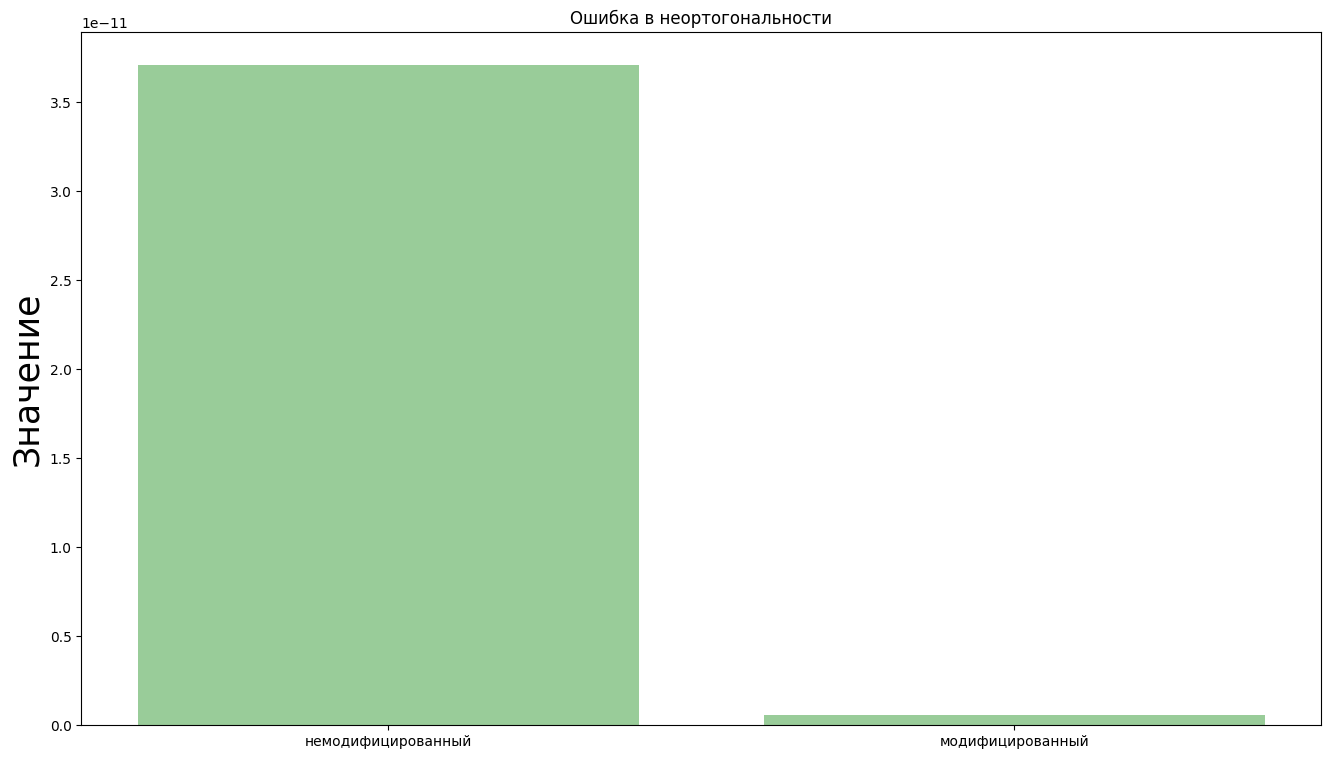

In [56]:
plt.figure(figsize = (16, 9))
plt.title("Ошибка в неортогональности")
plt.ylabel('Значение', fontsize  = 25)
plt.plot(np.range, [de, us],alpha = 0.4,color = "green", 
        label = 'Ошибка в ортогональности метода Грамма-Шмидта')
plt.show()

In [58]:
de, us = np.empty(0), np.empty(0) 
for i in range(20000):
    A = np.random.rand(10, 10)
    Q_d, R_d = find_QR_default(A)
    Q, R = find_QR(A)
    de = np.append(de, find_pairs_sum_norm(Q_d))
    us = np.append(us, find_pairs_sum_norm(Q))

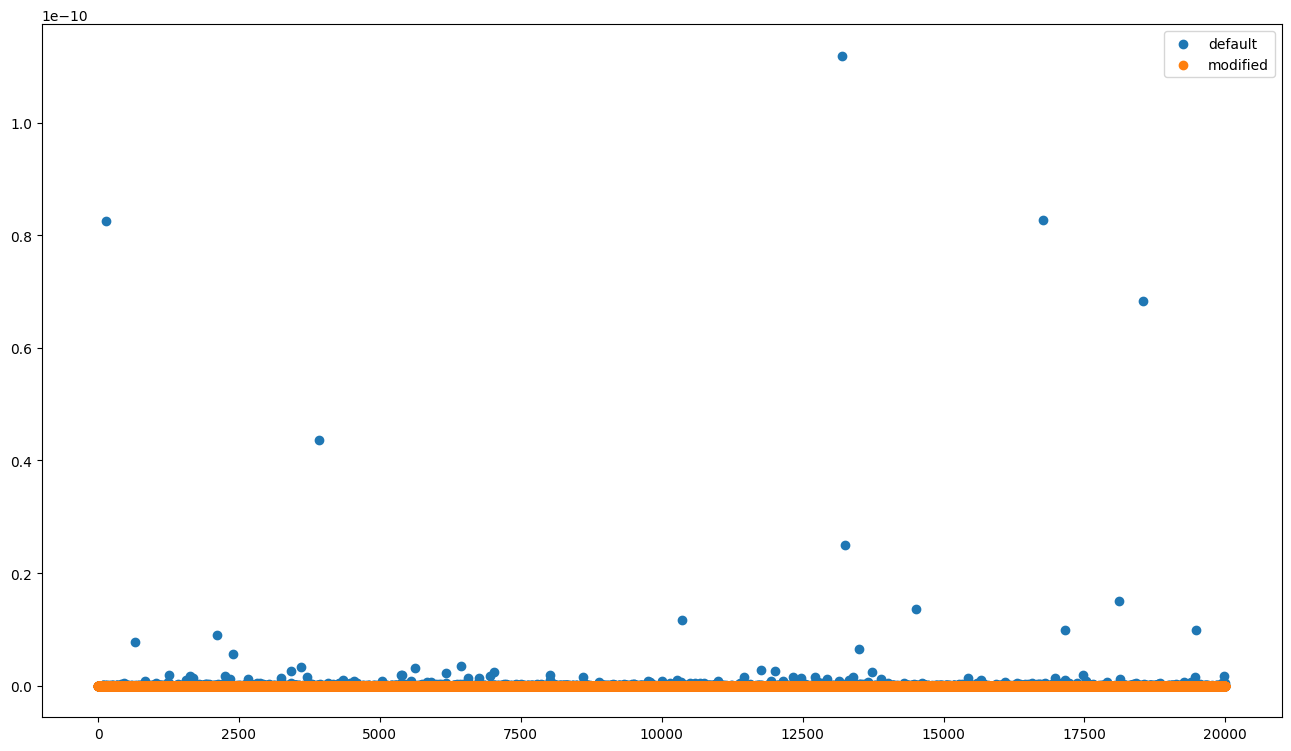

In [61]:
plt.figure(figsize = (16, 9))
plt.scatter(np.arange(1, 20001), de, label = 'default')
plt.scatter(np.arange(1, 20001), us, label = 'modified')
plt.legend()
plt.show()

In [71]:
def find_stats_diff(k_num):
    res = np.empty(0)
    for i in range(k_num):
        A = np.random.rand(100, 50)
        b = np.random.rand(100)
        x, _, _ = solve(A, b)
        lib_x = np.linalg.lstsq(A, b)[0]
        res = np.append(res,norm(x - lib_x)) 
    return res

/tmp/ipykernel_58043/849679353.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  lib_x = np.linalg.lstsq(A, b)[0]


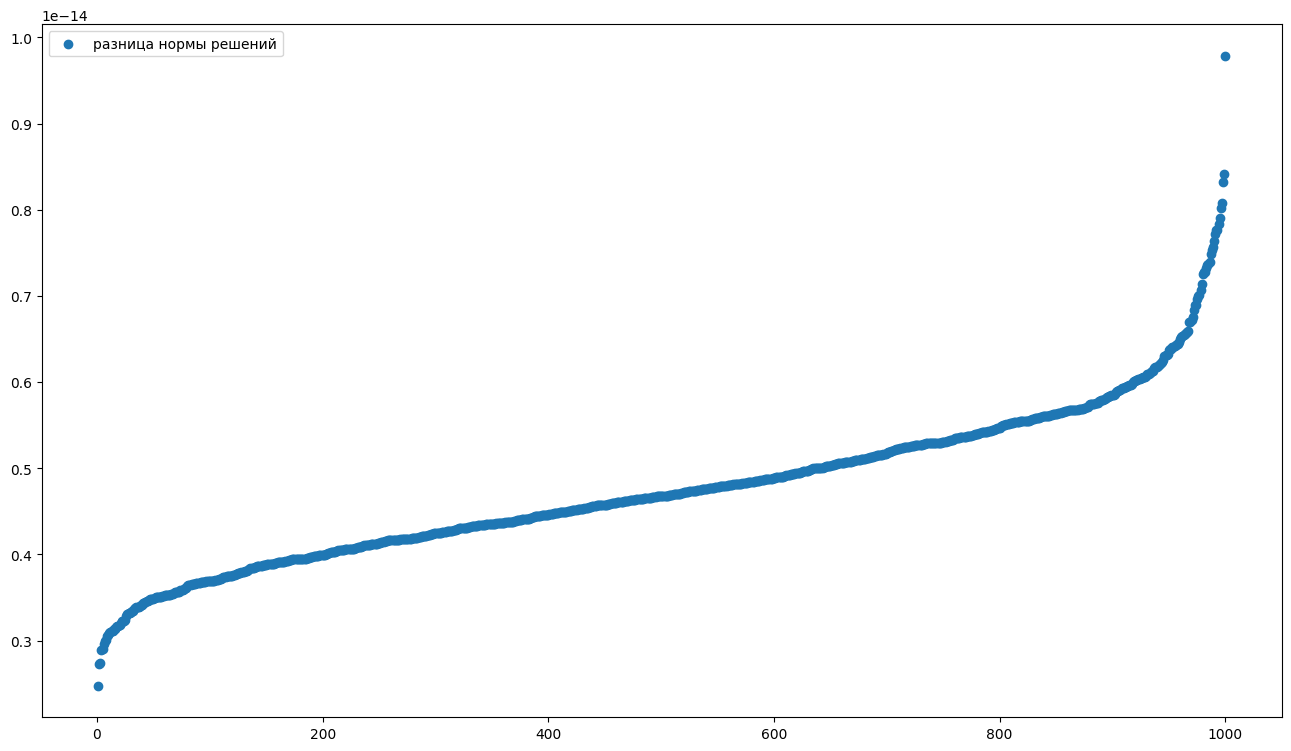

In [73]:
result = find_stats_diff(1000)
res = np.sort(result)
plt.figure(figsize = (16, 9))
plt.scatter(np.arange(1, 1001), res, label = 'разница нормы решений')
plt.legend()
plt.show()